<a href="https://colab.research.google.com/github/borita/codigo_facilito_machine_learning/blob/main/proyecto_final_clasificacion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

clasificacion Gradient Boosting

cargar archivos previamente generados

In [ ]:
from google.colab import files
import pandas as pd

# Paso 1: Subir archivos desde PC local
uploaded = files.upload()

# Paso 2: Leer  archivos uploads
df = pd.read_csv('mes_1.txt')
print(df.head())

# Paso 3: Guardar un archivo resultado y descargarlo a PC
df.to_csv('resultado.csv', index=False)
files.download('resultado.csv')

Saving mes_1.txt to mes_1 (3).txt
     ID Genero  Edad  Grado  Becado  Horas de Estudio  Horas de Tarea  \
0  S001      M    10     10       1          5.448561        4.380500   
1  S002      F    12      9       0          4.398627        2.641112   
2  S003      M    17     11       0          3.180663        2.683844   
3  S004      M    10     10       0          4.217794        3.565105   
4  S005      M    13      9       0          5.470478        3.703445   

   Horas de Tutoring  Calificacion  
0           2.985178    100.000000  
1           2.546036     76.201906  
2           1.018846     59.070642  
3           3.127948     87.404609  
4           2.592256     93.601384  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Leer archivo y limpiar nombres
df = pd.read_csv("mes_1.txt")
df.columns = df.columns.str.strip()

# 2. Crear Paso al vuelo según Calificacion
if "Paso" not in df.columns:
    if "Calificacion" in df.columns:
        df["Paso"] = df["Calificacion"].apply(lambda x: "Sí" if x >= 60 else "No")
    else:
        df["Paso"] = "Sí"  # valor por defecto

# 3. Crear variable Aprobó
df["Aprobó"] = df["Paso"].map({"Sí": "Aprobado", "No": "Reprobado"})

# 4. Variables predictoras y objetivo
# Excluir 'Paso' y 'Calificacion' para evitar data leakage
X = df.select_dtypes(include=["number"]).drop(columns=["Paso", "Calificacion"], errors="ignore")
y = df["Aprobó"]

# 5. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Modelo base
model = GradientBoostingClassifier(random_state=42)

# 7. Grid Search de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 8. Mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 9. Métricas
print("Mejores parámetros:", grid_search.best_params_)
print(f"Mejor accuracy en CV: {grid_search.best_score_:.4f}\n")

print("Accuracy en test:", accuracy_score(y_test, y_pred))
print("Precision en test:", precision_score(y_test, y_pred, average='weighted'))
print("Recall en test:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score en test:", f1_score(y_test, y_pred, average='weighted'))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
Mejor accuracy en CV: 0.9775

Accuracy en test: 0.98
Precision en test: 0.9804123711340206
Recall en test: 0.98
F1 score en test: 0.9776041666666667

Matriz de confusión:
 [[95  0]
 [ 2  3]]

Reporte de clasificación:
               precision    recall  f1-score   support

    Aprobado       0.98      1.00      0.99        95
   Reprobado       1.00      0.60      0.75         5

    accuracy                           0.98       100
   macro avg       0.99      0.80      0.87       100
weighted avg       0.98      0.98      0.98       100



mejora con balance o por clase //// entrenamiento sin balanceo  ////

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 500 non-null    object 
 1   Genero             500 non-null    object 
 2   Edad               500 non-null    int64  
 3   Grado              500 non-null    int64  
 4   Becado             500 non-null    int64  
 5   Horas de Estudio   500 non-null    float64
 6   Horas de Tarea     500 non-null    float64
 7   Horas de Tutoring  500 non-null    float64
 8   Calificacion       500 non-null    float64
 9   Paso               500 non-null    object 
 10  Aprobó             500 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 43.1+ KB


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Leer archivo y limpiar nombres
df = pd.read_csv("mes_1.txt")
df.columns = df.columns.str.strip()

# 2. Crear Paso al vuelo según Calificacion
if "Paso" not in df.columns:
    if "Calificacion" in df.columns:
        df["Paso"] = df["Calificacion"].apply(lambda x: "Sí" if x >= 60 else "No")
    else:
        df["Paso"] = "Sí"

# 3. Crear variable Aprobó
df["Aprobó"] = df["Paso"].map({"Sí": "Aprobado", "No": "Reprobado"})

# 4. Variables predictoras y objetivo (excluyendo Calificacion para evitar data leakage)
X = df.select_dtypes(include=["number"]).drop(columns=["Paso", "Calificacion"], errors="ignore")
y = df["Aprobó"]

# 5. División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify mantiene proporción de clases
)

# 6. Modelo con ajuste de peso de clases
model = GradientBoostingClassifier(random_state=42)

# 7. Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 8. Mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 9. Ajustar threshold para favorecer Reprobado (opcional)
# proba = best_model.predict_proba(X_test)
# threshold = 0.3  # reducir para favorecer minoritaria
# y_pred = [best_model.classes_[1] if p[1]>=threshold else best_model.classes_[0] for p in proba]

# 10. Métricas
print("Mejores parámetros:", grid_search.best_params_)
print(f"Mejor accuracy en CV: {grid_search.best_score_:.4f}\n")

print("Accuracy en test:", accuracy_score(y_test, y_pred))
print("Precision en test:", precision_score(y_test, y_pred, average='weighted'))
print("Recall en test:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score en test:", f1_score(y_test, y_pred, average='weighted'))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Mejor accuracy en CV: 0.9775

Accuracy en test: 0.97
Precision en test: 0.9828571428571429
Recall en test: 0.97
F1 score en test: 0.9738528138528137

Matriz de confusión:
 [[93  3]
 [ 0  4]]

Reporte de clasificación:
               precision    recall  f1-score   support

    Aprobado       1.00      0.97      0.98        96
   Reprobado       0.57      1.00      0.73         4

    accuracy                           0.97       100
   macro avg       0.79      0.98      0.86       100
weighted avg       0.98      0.97      0.97       100



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 500 non-null    object 
 1   Genero             500 non-null    object 
 2   Edad               500 non-null    int64  
 3   Grado              500 non-null    int64  
 4   Becado             500 non-null    int64  
 5   Horas de Estudio   500 non-null    float64
 6   Horas de Tarea     500 non-null    float64
 7   Horas de Tutoring  500 non-null    float64
 8   Calificacion       500 non-null    float64
 9   Paso               500 non-null    object 
 10  Aprobó             500 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 43.1+ KB


con HIPERPARAMETROS incluye balanceo

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# 1. Leer archivo y limpiar nombres
df = pd.read_csv("mes_1.txt")
df.columns = df.columns.str.strip()  # quitar espacios

# 2. Crear Paso al vuelo si no existe
if "Paso" not in df.columns:
    if "Calificacion" in df.columns:
        df["Paso"] = df["Calificacion"].apply(lambda x: "Sí" if x >= 60 else "No")
    else:
        df["Paso"] = "Sí"

# 3. Variables predictoras y objetivo (sin Calificacion para evitar data leakage)
X = df.select_dtypes(include=["number"]).drop(columns=["Paso", "Calificacion"], errors="ignore")
y = df["Paso"]

# 4. División en train/test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Balanceo de clases en entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 6. Modelo base
model = GradientBoostingClassifier(random_state=42)

# 7. Parámetros para Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4]
}

# 8. Configurar GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_res, y_train_res)

# 9. Mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 10. Métricas
print("Mejores parámetros:", grid_search.best_params_)
print(f"Mejor accuracy en CV: {grid_search.best_score_:.4f}\n")

print("Accuracy en test:", accuracy_score(y_test, y_pred))
print("Precision en test:", precision_score(y_test, y_pred, average='weighted'))
print("Recall en test:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score en test:", f1_score(y_test, y_pred, average='weighted'))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
Mejor accuracy en CV: 0.9882

Accuracy en test: 0.98
Precision en test: 0.9866666666666667
Recall en test: 0.98
F1 score en test: 0.9818947368421053

Matriz de confusión:
 [[ 4  0]
 [ 2 94]]

Reporte de clasificación:
               precision    recall  f1-score   support

          No       0.67      1.00      0.80         4
          Sí       1.00      0.98      0.99        96

    accuracy                           0.98       100
   macro avg       0.83      0.99      0.89       100
weighted avg       0.99      0.98      0.98       100



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 500 non-null    object 
 1   Genero             500 non-null    object 
 2   Edad               500 non-null    int64  
 3   Grado              500 non-null    int64  
 4   Becado             500 non-null    int64  
 5   Horas de Estudio   500 non-null    float64
 6   Horas de Tarea     500 non-null    float64
 7   Horas de Tutoring  500 non-null    float64
 8   Calificacion       500 non-null    float64
 9   Paso               500 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 39.2+ KB


GRAFICAR MATRIZ DE CONFUSION Y CURVA ROC

<Figure size 600x500 with 0 Axes>

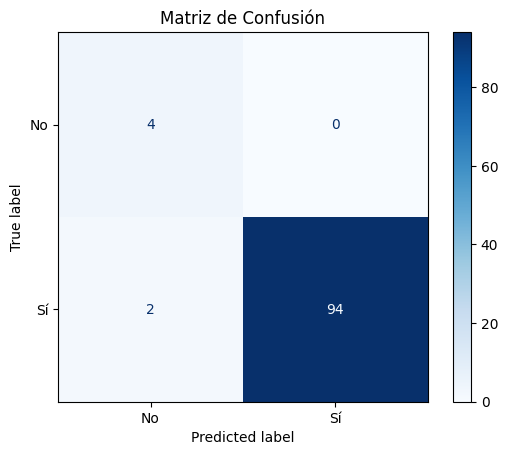

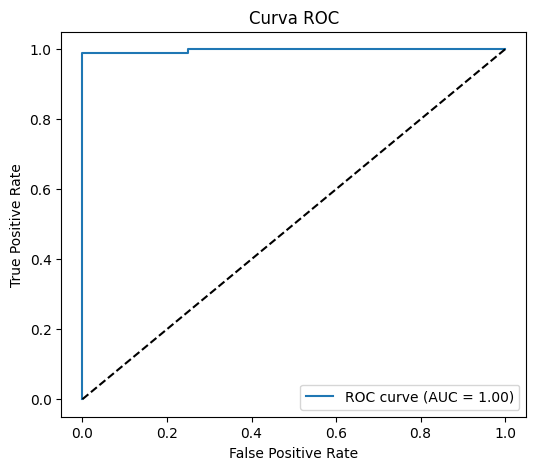

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Matriz de confusión
plt.figure(figsize=(6,5))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

# Curva ROC
##y_proba = best_model.predict_proba(X_test)[:,1]
##fpr, tpr, thresholds = roc_curve(y_test, y_proba)
##roc_auc = auc(fpr, tpr)

y_test_bin = y_test.map({'No':0, 'Sí':1})
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc='lower right')
plt.show()